Initialize euler ...
Time: 20.000
Divergence: 2.06e-05
Time: 40.000
Divergence: 8.82e-06


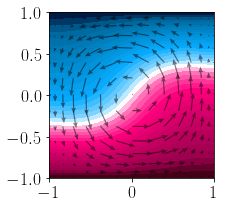

Nubot: 1.229257e+00
Nutop: 1.229257e+00
Nuvol: 1.227890e+00


In [4]:
import numpy as np 
import matplotlib.pyplot as plt
from pypde import *
from example.rbc2d import NavierStokes,nu,kappa,steady_fun
from pypde.field_operations import eval_Nu, eval_Nuvol
from scipy import optimize
import time

# -- Initialize Navier Stokes Solver
shape = (128,128)
Ra = 5e3
Ra = np.logspace(3.5,3.5,1)[0]
Pr = 1

NS = NavierStokes(shape=shape,dt=0.1,tsave=20.,
                  nu=nu(Ra/2.**3,Pr),kappa=kappa(Ra/2.**3,Pr),
                  dealias=True,integrator="eu",beta=1.0)
NS.iterate(40)
NS.plot()

# -- Eval Nu
Nuz,Nuv = NS.eval_Nu()

### Steady state

/home/philipp/local/python3.9/lib/python3.9/site-packages/scipy/optimize/nonlin.py:472: RuntimeWarning: invalid value encountered in double_scalars
  and dx_norm/self.x_rtol <= x_norm))


0:  |F(x)| = 0.000107769; step 1
1:  |F(x)| = 0.000257634; step 1
2:  |F(x)| = 0.000190439; step 1
3:  |F(x)| = 0.000202548; step 0.288566
4:  |F(x)| = 0.000130933; step 1
5:  |F(x)| = 7.55885e-05; step 1


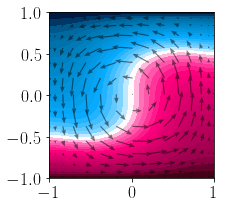

Nubot: 1.666154e+00
Nutop: 1.666154e+00
Nuvol: 1.666119e+00


(1.6661538346347404, 1.666119002987356)

In [4]:
sol = NS.solve_steady_state()

# Plot
NS.plot()
NS.eval_Nu()

### Multiple Steady State Calculations

Initialize euler ...
0:  |F(x)| = 0.0400167; step 1
1:  |F(x)| = 0.0477883; step 1
2:  |F(x)| = 0.0475941; step 1
3:  |F(x)| = 0.0401091; step 0.221389
4:  |F(x)| = 0.036768; step 0.239914
5:  |F(x)| = 0.0167849; step 0.392062
6:  |F(x)| = 0.0127833; step 1
7:  |F(x)| = 0.0140112; step 0.486788
8:  |F(x)| = 0.00671828; step 1
9:  |F(x)| = 0.00581387; step 1
10:  |F(x)| = 0.0107442; step 1
11:  |F(x)| = 0.0174945; step 1
12:  |F(x)| = 0.0190719; step 1
13:  |F(x)| = 0.0218803; step 1
14:  |F(x)| = 0.0195151; step 0.276477
15:  |F(x)| = 0.0113912; step 1
16:  |F(x)| = 0.00670887; step 1
17:  |F(x)| = 0.0146855; step 1
18:  |F(x)| = 0.00961193; step 1
19:  |F(x)| = 0.00821423; step 1
Nubot: 1.229257e+00
Nutop: 1.229257e+00
Nuvol: 1.227890e+00


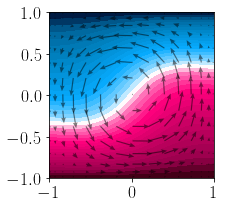

Initialize euler ...
0:  |F(x)| = 4.67535; step 1
1:  |F(x)| = 4.93456; step 1
2:  |F(x)| = 3.56714; step 1
3:  |F(x)| = 3.72862; step 1
4:  |F(x)| = 3.73314; step 1
5:  |F(x)| = 3.73228; step 1
6:  |F(x)| = 3.64433; step 1
7:  |F(x)| = 3.62231; step 1
8:  |F(x)| = 3.62174; step 1
9:  |F(x)| = 3.62166; step 1
10:  |F(x)| = 3.62146; step 1
11:  |F(x)| = 3.62007; step 1
12:  |F(x)| = 3.61999; step 0.211361
13:  |F(x)| = 2.41713; step 1
14:  |F(x)| = 2.39853; step 1
15:  |F(x)| = 2.40075; step 1
16:  |F(x)| = 2.40344; step 0.105484
17:  |F(x)| = 2.40325; step 1
18:  |F(x)| = 2.40297; step 1
19:  |F(x)| = 2.40317; step 0.105604
Nubot: 1.221709e+00
Nutop: 1.221709e+00
Nuvol: 1.394077e+00


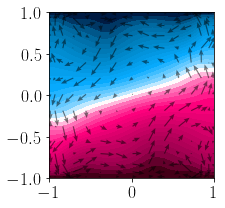

Initialize euler ...
0:  |F(x)| = 0.196408; step 0.012144
1:  |F(x)| = 0.0997588; step 1
2:  |F(x)| = 0.838015; step 1
3:  |F(x)| = 0.883174; step 1
4:  |F(x)| = 0.88317; step 0.105677
5:  |F(x)| = 0.683012; step 1


KeyboardInterrupt: 

In [5]:
Nu_dict = {} # Dict to store all Nusselt number calculated on the fly
Ra_all = np.logspace(3.5,4.5,3)

X0 = None
for Ra in Ra_all:
    if Ra in Nu_dict:
        print("Ra is already there! Skip ...")
        continue
    
    # Update Parameters
    NS.kappa = kappa(Ra/2.**3,Pr)
    NS.nu = nu(Ra/2.**3,Pr)
    NS.setup_solver()
    
    # Solve Steady State
    sol = NS.solve_steady_state(maxiter=300,tol=1e-4)
    X0 = sol.x
    
    # Evaluate Nusselt
    Nu,Nuv = NS.eval_Nu()
    Nu_dict[Ra] = Nu
    
    # Plot
    fig,ax = NS.plot(return_fig=True)
    plt.show()